Classification of breast tumor cancer with logistic regression model.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_data = pd.read_csv('data_breast_cancer_logistic_regression.csv')
df_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df_data.drop('Unnamed: 32', axis=1,inplace=True)

In [7]:
df_data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
df_data['diagnosis'].replace(to_replace='M',value = 1, inplace=True)
df_data['diagnosis'].replace(to_replace='B',value = 0, inplace=True)

In [9]:
df_data['diagnosis'].unique()

array([1, 0], dtype=int64)

In [23]:
df_data['diagnosis'].count()

569

In [24]:
# Contar la cantidad de ceros y unos en la columna "diagnosis"
diagnostico_ceros = df_data["diagnosis"].value_counts()[0]
diagnostico_unos = df_data["diagnosis"].value_counts()[1]

# Imprimir los resultados
print(f"Cantidad de diagnósticos con valor 0: {diagnostico_ceros}")
print(f"Cantidad de diagnósticos con valor 1: {diagnostico_unos}")

Cantidad de diagnósticos con valor 0: 357
Cantidad de diagnósticos con valor 1: 212


The diagnosis variable has 569 rows composed by 0's and 1's. We have 357 ceros and 212 number one. This is two check that owr two clases are in balance and they are. 

In [10]:
df_data_processing = df_data.copy()
df_data_processing

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Analisis de correlación

In [11]:
import matplotlib.pyplot as plt

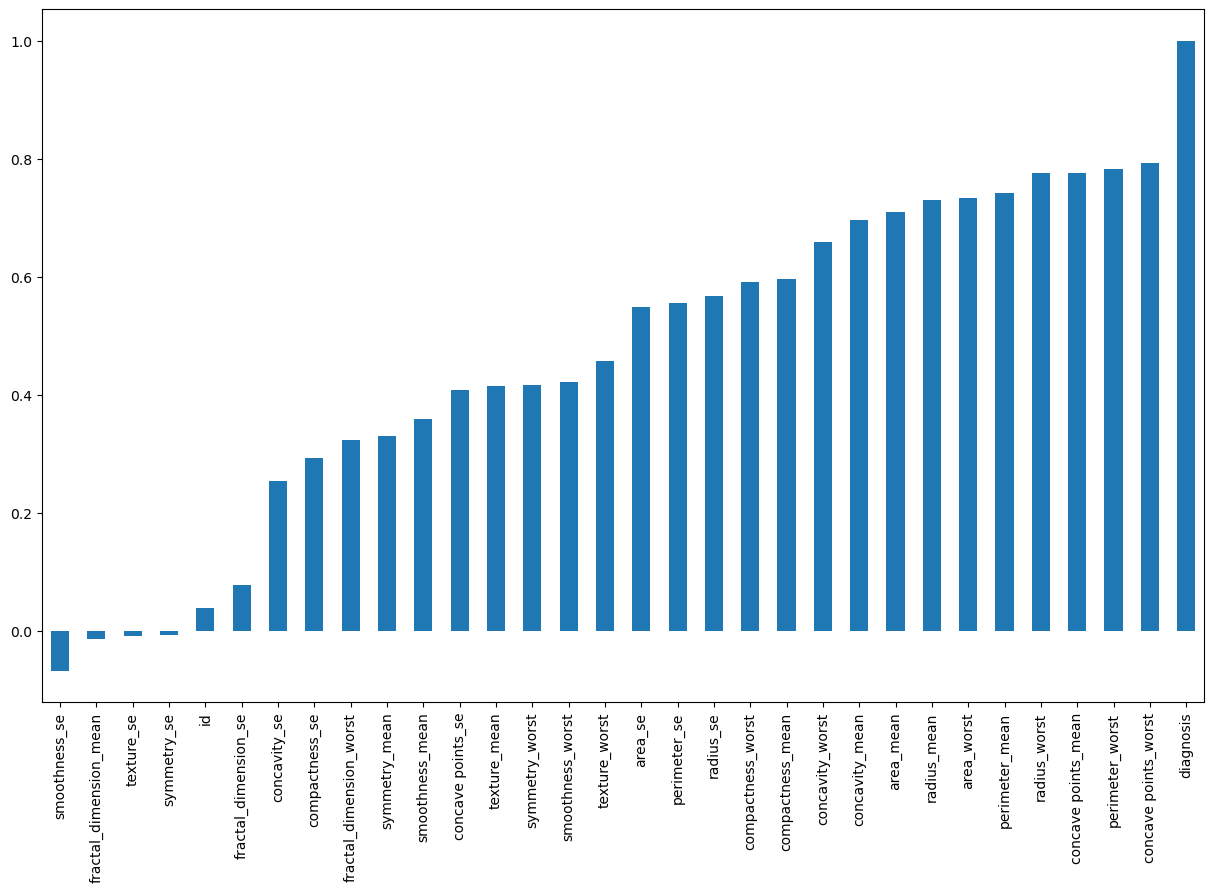

In [12]:
fig = plt.figure(figsize=(15,9))
df_data_processing.corr()['diagnosis'].sort_values(ascending=True).plot(kind='bar')
plt.show()

Escalando nuestros datos

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_data_processing_scaled = scaler.fit_transform(df_data_processing)

In [14]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)
df_data_processing_scaled.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.000915,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [15]:
df_data_processing_scaled.columns = df_data_processing.columns
df_data_processing_scaled.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [16]:
import seaborn as sns

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data=df_data,hue='diagnosis')
plt.show()

Entrenamiento del modelo de regresion logística binomial

In [17]:
X = df_data_processing_scaled.drop('diagnosis', axis=1)
y = df_data_processing_scaled['diagnosis'].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [19]:
X_train.shape

(398, 31)

In [20]:
X_test.shape

(171, 31)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train,y_train)

In [22]:
from sklearn import metrics 
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test))

0.9766081871345029


We obtain 0.97 accuracy score, so our model performes good. 

Model evaluation

In [25]:
model.predict_proba(X_test)

array([[8.14948024e-01, 1.85051976e-01],
       [3.80616632e-02, 9.61938337e-01],
       [1.73081326e-01, 8.26918674e-01],
       [9.36311806e-01, 6.36881938e-02],
       [9.75801146e-01, 2.41988537e-02],
       [1.01686649e-04, 9.99898313e-01],
       [9.24584163e-04, 9.99075416e-01],
       [2.96487439e-01, 7.03512561e-01],
       [5.03575926e-01, 4.96424074e-01],
       [9.56286059e-01, 4.37139405e-02],
       [8.74378382e-01, 1.25621618e-01],
       [2.65008076e-01, 7.34991924e-01],
       [9.13570551e-01, 8.64294491e-02],
       [3.26428826e-01, 6.73571174e-01],
       [9.51826459e-01, 4.81735415e-02],
       [2.32590364e-02, 9.76740964e-01],
       [9.39745307e-01, 6.02546927e-02],
       [9.91693604e-01, 8.30639610e-03],
       [9.98201901e-01, 1.79809923e-03],
       [6.59359987e-03, 9.93406400e-01],
       [7.23130360e-01, 2.76869640e-01],
       [9.17874393e-01, 8.21256071e-02],
       [6.37600840e-04, 9.99362399e-01],
       [9.90640600e-01, 9.35940046e-03],
       [9.603306

In [26]:
model.coef_

array([[ 1.53660096e-01,  1.63623691e+00,  1.45402942e+00,
         1.60288664e+00,  1.40937154e+00,  6.26115223e-01,
         3.31579339e-01,  1.34095510e+00,  2.05303701e+00,
         4.21756004e-01, -8.57606502e-01,  1.14189667e+00,
         6.33604084e-02,  8.57853639e-01,  7.50911141e-01,
        -1.37261682e-03, -5.13632635e-01, -1.91267907e-01,
         2.88709502e-01, -2.31472482e-01, -5.96897475e-01,
         2.06905507e+00,  2.08080996e+00,  1.87170548e+00,
         1.49777581e+00,  1.31049360e+00,  7.79570446e-01,
         1.39903672e+00,  2.45215208e+00,  1.31268073e+00,
         2.26201365e-01]])

In [27]:
model.feature_names_in_

array(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

Axes(0.125,0.11;0.775x0.77)


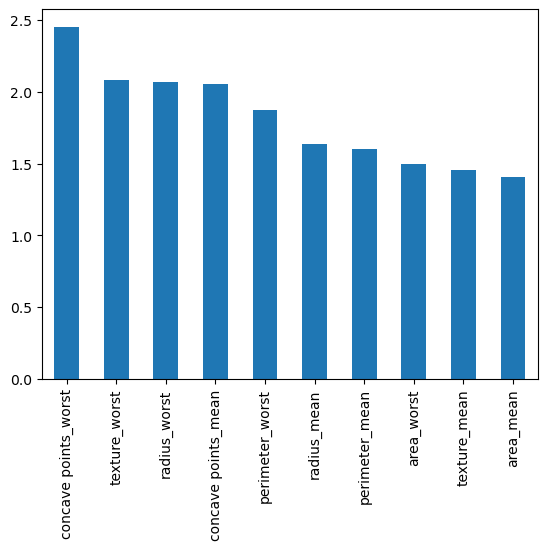

In [28]:
weights = pd.Series(model.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

The variable with more weight in our model is concave points_worst.

Axes(0.125,0.11;0.775x0.77)


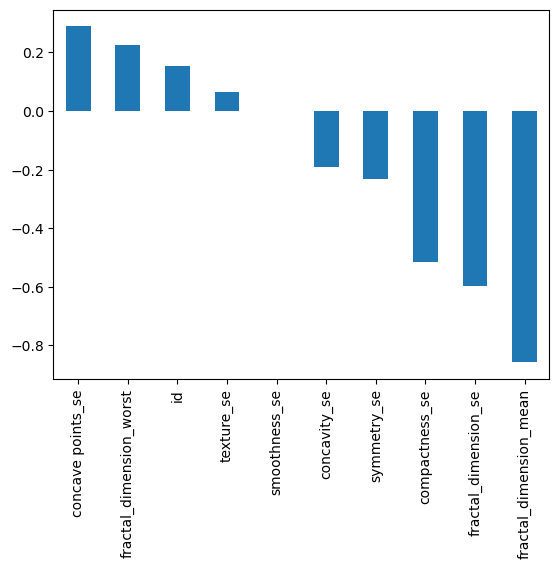

In [29]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

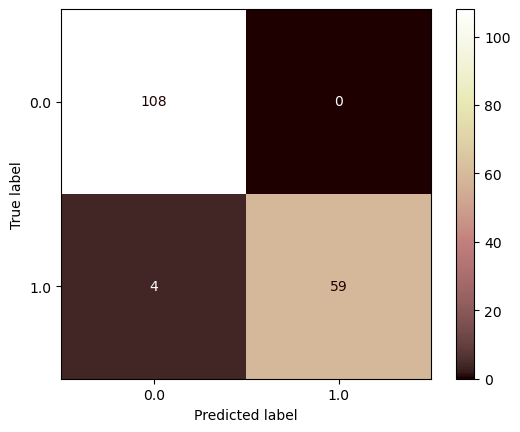

In [33]:
cm = confusion_matrix(y_test,prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels=model.classes_)
disp.plot(cmap='pink')
plt.show()

In this project, we developed a classification model for breast tumors using logistic regression. We trained the model on a dataset of 398 records, achieving an accuracy score of 0.97. Subsequently, the model was evaluated on a separate testing set of 171 records. Of these, the model correctly predicted 108 records as negative (0/Bening) and 59 records as positive (1/Malign).
